In [2]:
%matplotlib inline
import os
import importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

/home/sam/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:53: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [4]:
# https://openflights.org/data.html
airports = pd.read_csv(
    os.path.join('../data', 'airports.csv'), index_col="Airport_ID"
)
print(airports.shape)
print(airports.columns)

# """
# Airport_ID	Unique OpenFlights identifier for this airport.
# Name	Name of airport. May or may not contain the City name.
# City	Main city served by airport. May be spelled differently from Name.
# Country	Country or territory where airport is located. See Countries to cross-reference to ISO 3166-1 codes.
# IATA	3-letter IATA code. Null if not assigned/unknown.
# ICAO	4-letter ICAO code.
# Null if not assigned.
# Latitude	Decimal degrees, usually to six significant digits. Negative is South, positive is North.
# Longitude	Decimal degrees, usually to six significant digits. Negative is West, positive is East.
# Altitude	In feet.
# Timezone	Hours offset from UTC. Fractional hours are expressed as decimals, eg. India is 5.5.
# DST	Daylight savings time. One of E (Europe), A (US/Canada), S (South America), O (Australia), Z (New Zealand), N (None) or U (Unknown). See also: Help: Time
# Tz database time zone	Timezone in "tz" (Olson) format, eg. "America/Los_Angeles".
# Type	Type of the airport. Value "airport" for air terminals, "station" for train stations, "port" for ferry terminals and "unknown" if not known. In airports.csv, only type=airport is included.
# Source	Source of this data. "OurAirports" for data sourced from OurAirports, "Legacy" for old data not matched to OurAirports (mostly DAFIF), "User" for unverified user contributions. In airports.csv, only source=OurAirports is included.
# """

(7698, 13)
Index(['Name', 'City', 'Country', 'IATA', 'ICAO', 'Latitude', 'Longitude',
       'Altitude', 'Timezone', 'DST', 'Tz', 'Type', 'Source'],
      dtype='object')


In [5]:
#print(airports.columns)
#airports[airports['Country'] == 'United States']
air_passenger_airports = ['ATL', 'BOS', 'CLT', 'DEN', 'DFW', 'DTW', 'EWR', 'IAH', 'JFK',
       'LAS', 'LAX', 'LGA', 'MCO', 'MIA', 'MSP', 'ORD', 'PHL', 'PHX',
       'SEA', 'SFO']
print(len(air_passenger_airports))
airports[(airports['Country'] == 'United States') & (airports['IATA'].isin(air_passenger_airports))]#[['IATA','ICAO','Latitude','Longitude','Altitude']]

20


,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz,Type,Source
Airport_ID,,,,,,,,,,,,,
3448,General Edward Lawrence Logan International Ai...,Boston,United States,BOS,KBOS,42.364300,-71.005203,20,-5,A,America/New_York,airport,OurAirports
3462,Phoenix Sky Harbor International Airport,Phoenix,United States,PHX,KPHX,33.434299,-112.012001,1135,-7,N,America/Phoenix,airport,OurAirports
3469,San Francisco International Airport,San Francisco,United States,SFO,KSFO,37.618999,-122.375000,13,-8,A,America/Los_Angeles,airport,OurAirports
3484,Los Angeles International Airport,Los Angeles,United States,LAX,KLAX,33.942501,-118.407997,125,-8,A,America/Los_Angeles,airport,OurAirports
3494,Newark Liberty International Airport,Newark,United States,EWR,KEWR,40.692501,-74.168701,18,-5,A,America/New_York,airport,OurAirports
3550,George Bush Intercontinental Houston Airport,Houston,United States,IAH,KIAH,29.984400,-95.341400,97,-6,A,America/Chicago,airport,OurAirports
3576,Miami International Airport,Miami,United States,MIA,KMIA,25.793200,-80.290604,8,-5,A,America/New_York,airport,OurAirports
3577,Seattle Tacoma International Airport,Seattle,United States,SEA,KSEA,47.449001,-122.308998,433,-8,A,America/Los_Angeles,airport,OurAirports
3645,Detroit Metropolitan Wayne County Airport,Detroit,United States,DTW,KDTW,42.212399,-83.353401,645,-5,A,America/New_York,airport,OurAirports


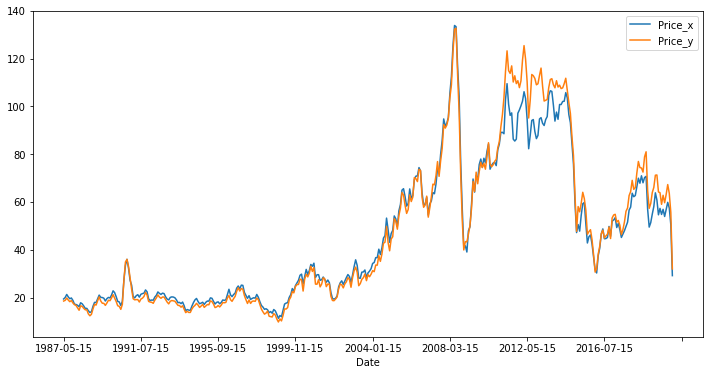

In [6]:
# https://datahub.io/core/oil-prices#data
brent = pd.read_csv(
    os.path.join('../data', 'brent-monthly_csv.csv')
)
# brent.set_index('Date').plot(figsize=(12,6))
# brent.shape
wti = pd.read_csv(
    os.path.join('../data', 'wti-monthly_csv.csv')
)
# wti.set_index('Date').plot(figsize=(12,6))
# wti.shape
wti.merge(brent, on="Date").set_index('Date').plot(figsize=(12,6))

In [31]:
# https://www.census.gov/data/tables/time-series/demo/popest/2010s-total-cities-and-towns.html
us_population2 = pd.read_csv(
    os.path.join('../data', 'us_population2.csv'),encoding='latin-1'
)
print(us_population2.shape)
city = 'Boston'
state = 'Massachusetts'
us_population2[us_population2["GEO.display-label"].str.contains(city) & us_population2["GEO.display-label"].str.contains(state)]

(19496, 14)


,GEO.id,GEO.id2,GEO.display-label,rescen42010,resbase42010,respop72010,respop72011,respop72012,respop72013,respop72014,respop72015,respop72016,respop72017,respop72018
7536,1620000US2507000,2507000,"Boston city, Massachusetts",617594,617786,621074,630480,643003,653103,663017,670791,680470,688276,694583


## Importation et merge des premiers dataset

**airports_kaggle** : 
    - code IATA
    - l'abréviation de la ville 
    - le nom de la ville 
    - Latitude/Longitude
    
**States** : permet d'avoir le nom complet de la ville

**airports_openflights** : 
    - Altitude de l'aréoport
    - TimeZone 
Une fois mergé, on ne garde que les 20 aéroports qui nous interesse.

In [67]:
# https://www.kaggle.com/usdot/flight-delays#airports.csv
airports_kaggle = pd.read_csv(
    os.path.join('../data', 'airports_kaggle.csv')
).rename(columns={"IATA_CODE":"IATA"}).drop(columns=['AIRPORT','COUNTRY'])

# CSV des abréviations des states : "Alabama":"AL"
states = pd.read_csv(
    os.path.join('../data', 'states.csv')
).rename(columns={"State":"STATE_FULL","Abbreviation":"STATE" })

airports_kaggle = airports_kaggle.merge(states, on="STATE")

# https://openflights.org/data.html
airports_openflights = pd.read_csv(
    os.path.join('../data', 'airports.csv'), index_col="Airport_ID"
)[['IATA', 'Altitude', "Tz"]]
airports_merged = airports_kaggle.merge(airports_openflights, on ="IATA").drop(columns=['STATE'])

In [68]:
# On ne garde que les airports du starting kit
air_passenger_airports = ['ATL', 'BOS', 'CLT', 'DEN', 'DFW', 'DTW', 'EWR', 'IAH', 'JFK',
       'LAS', 'LAX', 'LGA', 'MCO', 'MIA', 'MSP', 'ORD', 'PHL', 'PHX',
       'SEA', 'SFO']
airports = airports_merged[airports_merged['IATA'].isin(air_passenger_airports)]
print( sorted(airports.IATA.values) == sorted(air_passenger_airports))
airports['Tz'] = airports['Tz'].apply(lambda row : row.split("/")[1])
airports.head()

True


/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,IATA,CITY,LATITUDE,LONGITUDE,STATE_FULL,Altitude,Tz
5,PHL,Philadelphia,39.87195,-75.24114,Pennsylvania,36,New_York
17,DFW,Dallas-Fort Worth,32.89595,-97.03720,Texas,607,Chicago
23,IAH,Houston,29.98047,-95.33972,Texas,97,Chicago
41,ATL,Atlanta,33.64044,-84.42694,Georgia,1026,New_York
47,BOS,Boston,42.36435,-71.00518,Massachusetts,20,New_York


## Unemployement 

In [260]:
# https://www.kaggle.com/jayrav13/unemployment-by-county-us/data#output.csv
# Taux de chomage tout les mois de 1990 à 2016 tout les mois pour chaque County (compté) des States
unemployment = pd.read_csv(
    os.path.join('../data', 'unemployment.csv')
)
unemployment.head()
print(unemployment.shape)

# recuperation des states de nos airports
STATE_FULL = airports.STATE_FULL.unique()
# On ne garde que les States des airports du strating kit 
unemployment = unemployment[unemployment['State'].isin(STATE_FULL)]
print(unemployment.shape)
unemployment.head()

(885548, 5)
(289284, 5)


,Year,Month,State,County,Rate
162,2015,February,Minnesota,Sibley County,5.5
163,2015,February,Minnesota,Carver County,3.8
164,2015,February,Minnesota,McLeod County,5.0
165,2015,February,Minnesota,Blue Earth County,3.6
166,2015,February,Minnesota,Todd County,5.9


In [256]:
# Unemployement du Minnesota pour le mois de February pour par County pour l'année 2010 pour chaque mois 
# county_unemployment = unemployment[(unemployment['State'] == 'Minnesota') & (unemployment['Year'] == 2010) & (unemployment['Month'] == "February")]#.describe()
# for month in state_unemployment['Month'].unique():
#     plot_county_unemployment = unemployment[(unemployment['State'] == 'Minnesota') & (unemployment['Year'] == 2010) & (unemployment['Month'] == month)][['County', 'Rate']]
#     plt.plot(plot_county_unemployment.County, plot_county_unemployment.Rate)
#plt.show()

# Unemployement du Minnesota pour le mois de February pour par County pour l'année 2010 pour chaque mois 
# county_unemployment = unemployment[(unemployment['State'] == 'Minnesota') & (unemployment['Year'] == 2010) & (unemployment['Month'] == "February")]#.describe()
# for month in state_unemployment['Month'].unique():
#     plot_county_unemployment = unemployment[(unemployment['State'] == 'Minnesota') & (unemployment['Year'] == 2010) & (unemployment['Month'] == month)][['County', 'Rate']]
#     plt.plot(plot_county_unemployment.County, plot_county_unemployment.Rate)


In [261]:
# Nous allons calculer la moyenne des County pour garder une granularité par état
unemployment = unemployment.groupby(['Year','State','Month']).mean().reset_index()
state_unemployment = unemployment.groupby(['Year','State','Month']).mean().reset_index()
def monthToNum(shortMonth):
    return{
            'January' : 1,
            'February' : 2,
            'March' : 3,
            'April' : 4,
            'May' : 5,
            'June' : 6,
            'July' : 7,
            'August' : 8,
            'September' : 9, 
            'October' : 10,
            'November' : 11,
            'December' : 12
    }[shortMonth]
state_unemployment['Month'] = state_unemployment['Month'].apply(lambda month : monthToNum(month))

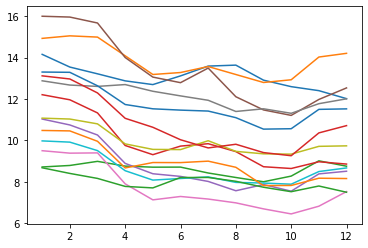

In [263]:
# Unemployement par mois pour chaques state pour l'année 2010 
for state in state_unemployment['State'].unique():
    plot_state_unemployment = state_unemployment[(state_unemployment['State'] == state) & (state_unemployment['Year'] == 2010)][['Month', 'Rate']].sort_values(by="Month")
    plt.plot(plot_state_unemployment.Month, plot_state_unemployment.Rate)
plt.show()

In [279]:
# Le but ici est de créer une date à partir de month et year
#state_unemployment['unemployement_date'] = state_unemployment['Year'].astype('str') +'-'+state_unemployment['Month'].astype('str')
state_unemployment['unemployement_date'] = pd.to_datetime((state_unemployment.Year*10000+state_unemployment.Month*100+ 1).apply(str),format='%Y%m%d')
state_unemployment
state_unemployment.head()

,Year,State,Month,Rate,unemployement_date
0,1990,Arizona,4,7.620000,1990-04-01
1,1990,Arizona,8,9.540000,1990-08-01
2,1990,Arizona,12,7.286667,1990-12-01
3,1990,Arizona,2,8.333333,1990-02-01
4,1990,Arizona,1,8.540000,1990-01-01


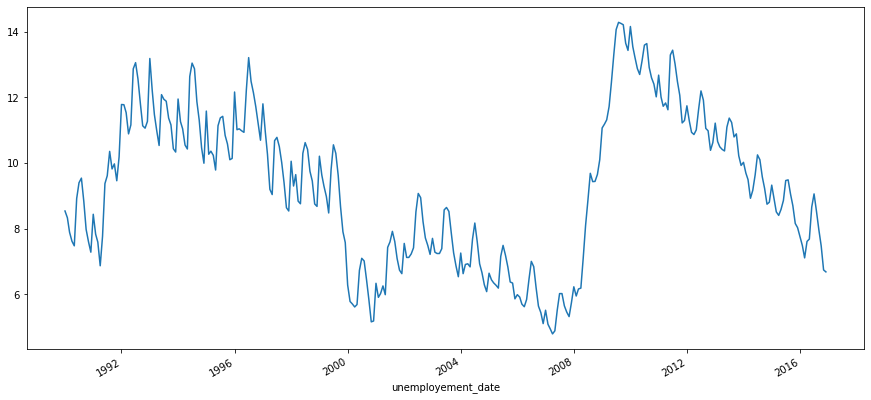

In [292]:
plt.figure(figsize=(15,7))
state_unemployment[(state_unemployment['State'] == 'Arizona')].set_index('unemployement_date')['Rate'].plot()

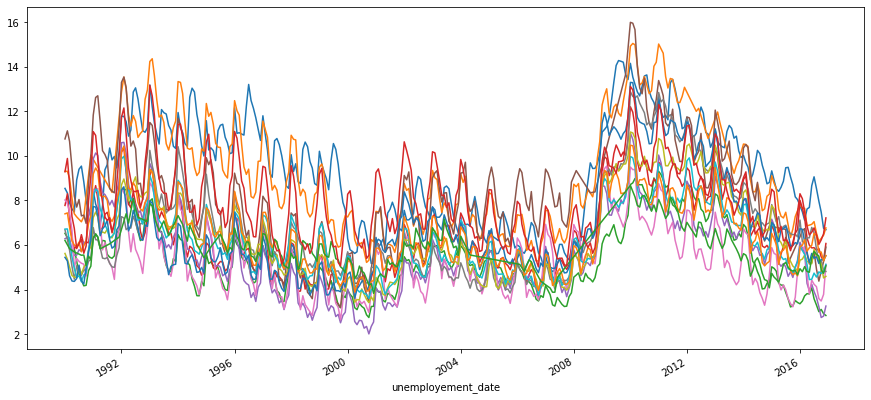

In [293]:
plt.figure(figsize=(15,7))
for state in state_unemployment.State.unique():
    state_unemployment[(state_unemployment['State'] == state)].set_index('unemployement_date')['Rate'].plot()

In [298]:
state_unemployment[['Rate','unemployement_date']]

,Rate,unemployement_date
0,7.620000,1990-04-01
1,9.540000,1990-08-01
2,7.286667,1990-12-01
3,8.333333,1990-02-01
4,8.540000,1990-01-01
...,...,...
4369,7.487179,2016-03-01
4370,6.451282,2016-05-01
4371,6.505128,2016-11-01
4372,6.225641,2016-10-01
